In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
dataset_df = pd.read_csv("dataset/mbti_1.csv")
print(dataset_df)

      type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]


In [3]:
dataset_df.info

<bound method DataFrame.info of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]>

In [4]:
count=dataset_df.groupby(['type']).count()
count

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


Text(0.5, 1.0, 'Total posts for each personality type')

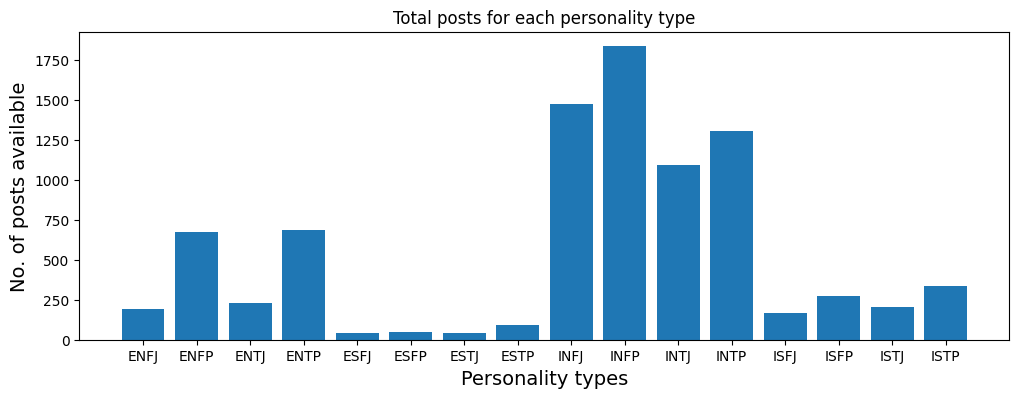

In [5]:
plt.figure(figsize = (12,4))
plt.bar(np.array(count.index), height = count['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')


In [6]:
dataset_df['Post_Length']=dataset_df['posts'].str.len() + 1

In [7]:
dataset_df

,type,posts,Post_Length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4653
1,ENTP,'I'm finding the lack of me in these posts ver...,7054
2,INTP,'Good one _____ https://www.youtube.com/wat...,5266
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6272
4,ENTJ,'You're fired.|||That's another silly misconce...,6112
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5012
8671,ENFP,'So...if this thread already exists someplace ...,7903
8672,INTP,'So many questions when i do these things. I ...,5773
8673,INFP,'I am very conflicted right now when it comes ...,9480


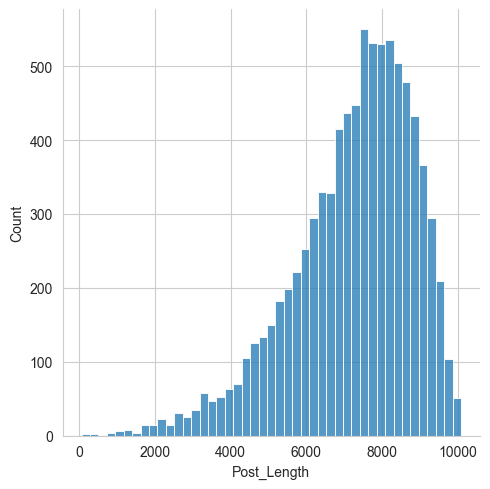

In [8]:
sb.set_style('whitegrid')
sb.displot(dataset_df['Post_Length'],kde=False,bins=45)

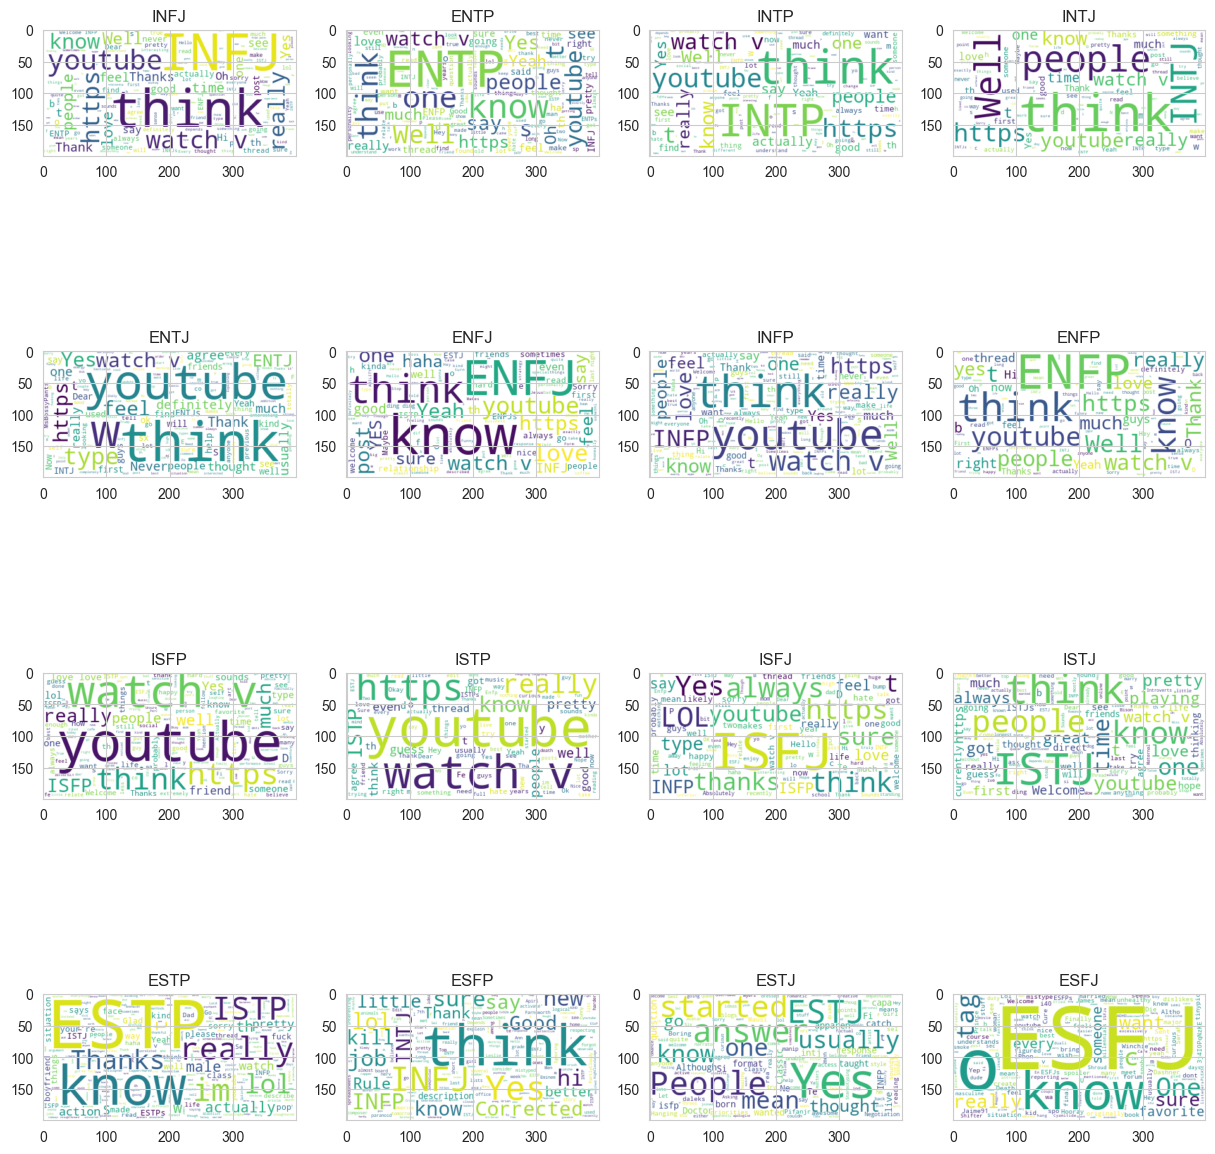

In [9]:
fig, ax = plt.subplots(len(dataset_df['type'].unique()), sharex=True, figsize=(15,len(dataset_df['type'].unique())))
k = 0
for i in dataset_df['type'].unique():
    df_4 = dataset_df[dataset_df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False,background_color="white").generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1